In [3]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#NLP Sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

Matplotlib is building the font cache; this may take a moment.


# Textual Data Exploration

In [5]:
# Van Halen 1984 album
album_folder = "./Data/1984 album Van Halen"
songs = os.listdir(album_folder)
songs

['Drop Dead Legs.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 "I'll Wait.txt",
 'Jump.txt',
 'Panama.txt',
 'Top Jimmy.txt']

In [7]:
album_corpus = []

for lyrics in songs:
    with open(album_folder+'/'+lyrics, encoding='utf8')as f_input:
        album_corpus.append(f_input.read())

In [8]:
album_corpus

["Drop dead legs, pretty smile\nHurts my head, gets me wild\nDig that steam\nGiant butt\nMakes me scream\nI get nothing, nothing but the shakes over you\nAnd nothing else could ever do\n\n[Chorus:]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?\n\nDig those moves, vampire\nSet me loose, get it higher\nThrow my rope, loop-de-loop\nNice white teeth, Betty Boop\nSet it cool, real heavy\nI ain't fooled, gettin' ready\nOooh, aw baby\n\n[Chorus]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?",
 "[Verse 1]\nAh lazy eyes in the summer heat\nFresh from outta town\nNow she's working on the street\nShakin' poor boys down\n\n[Chorus]\nUh (girl) uh girl gone bad\n(Girl) girl gone bad\n\n[Verse 2]\nFound that girl with a lonesome John\nBut she should've been with me\nGuess that woman fallen in love\nShe don't work for fr

In [10]:
album_word_list= []
for lyrics in album_corpus:
    for word in lyrics.split():
        album_word_list.append(word)
        
album_word_list

['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'my',
 'head,',
 'gets',
 'me',
 'wild',
 'Dig',
 'that',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'me',
 'scream',
 'I',
 'get',
 'nothing,',
 'nothing',
 'but',
 'the',
 'shakes',
 'over',
 'you',
 'And',
 'nothing',
 'else',
 'could',
 'ever',
 'do',
 '[Chorus:]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it,',
 'baby',
 'When',
 'the',
 'night',
 'is',
 'through,',
 'will',
 'I',
 'still',
 'be',
 'loving',
 'you?',
 'Dig',
 'those',
 'moves,',
 'vampire',
 'Set',
 'me',
 'loose,',
 'get',
 'it',
 'higher',
 'Throw',
 'my',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'it',
 'cool,',
 'real',
 'heavy',
 'I',
 "ain't",
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'kno

In [11]:
len(album_word_list)

1398

In [13]:
album_word_count_unique= Counter(album_word_list)

len(album_word_count_unique)

493

In [14]:
# George Orwell 1984 novel

novel="./Data/1984-novel-George Orwell.txt"

novel_corpus =[]

with open(novel, encoding='utf8') as f_input:
    novel_corpus.append(f_input.read())

In [15]:
novel_corpus

['Title:      Nineteen eighty-four\nAuthor:     George Orwell (pseudonym of Eric Blair) (1903-1950)\n\n\n\n\nPART ONE\n\n\n\nChapter 1\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin prepara

In [16]:
novel_word_list = novel_corpus[0].split()


In [17]:
novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [18]:
len(novel_word_list)

103377

In [20]:
len(Counter(novel_word_list))

15530

# Word Clouds

In [21]:
stopwords = list(get_stop_words("english"))

In [22]:
stopwords

['asking',
 'whenever',
 'everything',
 'likely',
 'right',
 'said',
 'me',
 'etc',
 'nine',
 'm',
 'under',
 'k',
 'definitely',
 'mostly',
 'think',
 'my',
 'keeps',
 'overall',
 'nd',
 'considering',
 "they've",
 'greetings',
 'way',
 'here',
 'follows',
 'different',
 'everywhere',
 'hence',
 'look',
 'there',
 'despite',
 'her',
 'thereafter',
 'sorry',
 'no',
 'certain',
 'namely',
 'probably',
 'anyone',
 'at',
 'onto',
 'course',
 'such',
 'on',
 'howbeit',
 'become',
 'four',
 'immediate',
 'j',
 'ourselves',
 'former',
 'their',
 'changes',
 'until',
 "c'mon",
 'say',
 "you'd",
 'sometime',
 'rather',
 'instead',
 "how's",
 "we'd",
 'thanks',
 'would',
 'himself',
 'also',
 'much',
 'afterwards',
 'latterly',
 'even',
 'another',
 'him',
 'less',
 'somewhere',
 'given',
 "wouldn't",
 'which',
 'he',
 'v',
 'non',
 'next',
 'not',
 'all',
 'gives',
 'z',
 'done',
 'according',
 'following',
 'from',
 'across',
 'same',
 'besides',
 'perhaps',
 "a's",
 'keep',
 'thanx',
 'neith

In [24]:
clean_album_word_list=[]
for word in album_word_list:
    if word not in stopwords:
        clean_album_word_list.append(word)

In [25]:
clean_album_word_list

['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'head,',
 'wild',
 'Dig',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'scream',
 'I',
 'nothing,',
 'shakes',
 'And',
 '[Chorus:]',
 'You',
 'I',
 'You',
 'it,',
 'baby',
 'When',
 'night',
 'through,',
 'I',
 'loving',
 'you?',
 'Dig',
 'moves,',
 'vampire',
 'Set',
 'loose,',
 'higher',
 'Throw',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'cool,',
 'real',
 'heavy',
 'I',
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'I',
 'You',
 'it,',
 'baby',
 'When',
 'night',
 'through,',
 'I',
 'loving',
 'you?',
 '[Verse',
 '1]',
 'Ah',
 'lazy',
 'eyes',
 'summer',
 'heat',
 'Fresh',
 'outta',
 'town',
 'Now',
 'working',
 'street',
 "Shakin'",
 'poor',
 'boys',
 '[Chorus]',
 'Uh',
 '(girl)',
 'uh',
 'girl',
 'bad',
 '(Girl)',
 'girl',
 'bad',
 '[Verse',
 '2]',
 'Found',
 'girl',
 'lonesome',
 'John',
 'But',
 "should've",
 'Guess',
 'woman',
 'fallen',
 'love'

In [27]:
import nltk

frequency_of_clean_album_words = nltk.FreqDist(clean_album_word_list)

In [28]:
frequency_of_clean_album_words

FreqDist({'I': 37, '[Chorus]': 17, 'bad,': 16, 'bad': 15, "I'm": 15, 'hot': 13, '[Verse': 12, 'teacher': 12, 'jump': 12, 'Panama': 10, ...})

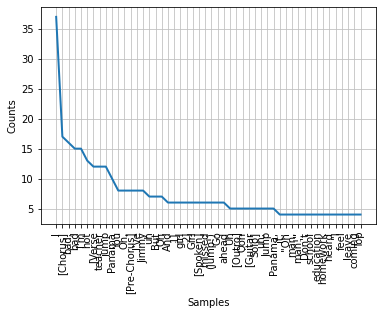

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
frequency_of_clean_album_words.plot(50, cumulative=False)

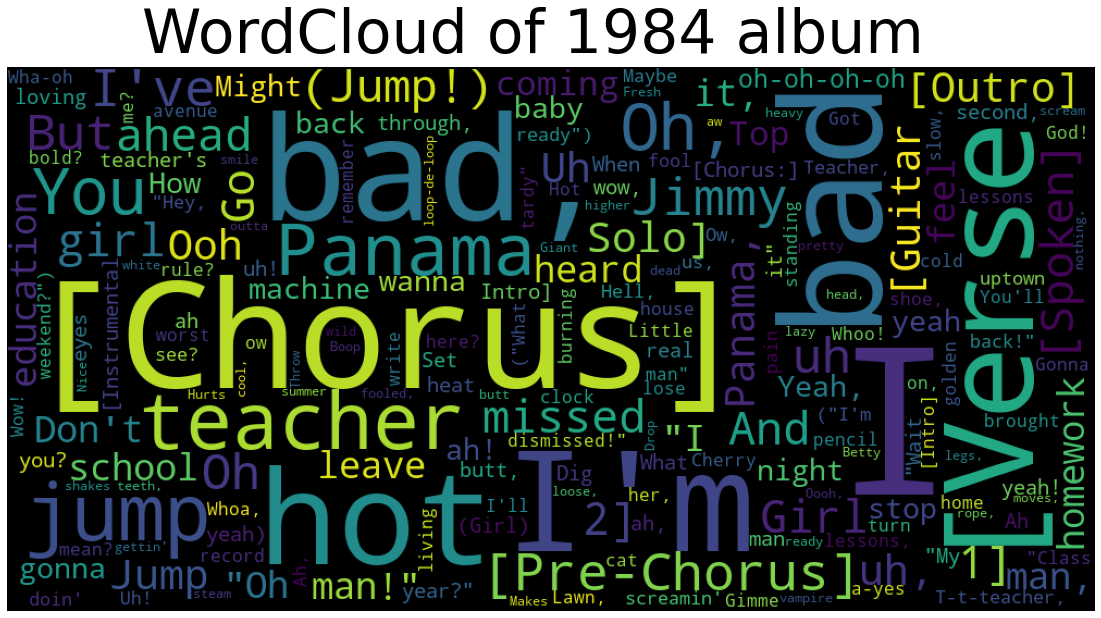

In [31]:
count_clean_album_word_list = Counter(clean_album_word_list)

wordcloud_1984_album = WordCloud(width=1000, height= 500). generate_from_frequencies(count_clean_album_word_list)

plt.figure(figsize=(20, 10))
plt.figtext(.5,.9, "WordCloud of 1984 album", fontsize=60, ha='center')
plt.imshow(wordcloud_1984_album)
plt.axis("off")
plt.show()

In [32]:
clean_novel_word_list= []
for word in novel_word_list:
    if word not in stopwords:
        clean_novel_word_list.append(word)

In [33]:
clean_novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'bright',
 'cold',
 'day',
 'April,',
 'clocks',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'chin',
 'nuzzled',
 'breast',
 'effort',
 'escape',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'glass',
 'doors',
 'Victory',
 'Mansions,',
 'quickly',
 'prevent',
 'swirl',
 'gritty',
 'dust',
 'entering',
 'him.',
 'The',
 'hallway',
 'smelt',
 'boiled',
 'cabbage',
 'rag',
 'mats.',
 'At',
 'end',
 'coloured',
 'poster,',
 'large',
 'indoor',
 'display,',
 'tacked',
 'wall.',
 'It',
 'depicted',
 'simply',
 'enormous',
 'face,',
 'metre',
 'wide:',
 'face',
 'man',
 'forty-five,',
 'heavy',
 'black',
 'moustache',
 'ruggedly',
 'handsome',
 'features.',
 'Winston',
 'made',
 'stairs.',
 'It',
 'lift.',
 'Even',
 'times',
 'seldom',
 'working,',
 'present',
 'electric',
 'current',
 'cut',
 'daylight',
 'hours.',
 'It'

In [34]:
frequency_of_clean_novel_word_list = nltk.FreqDist(clean_novel_word_list)

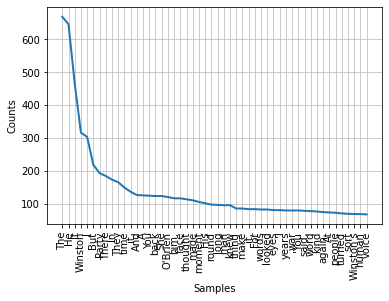

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
frequency_of_clean_novel_word_list.plot(50, cumulative=False)

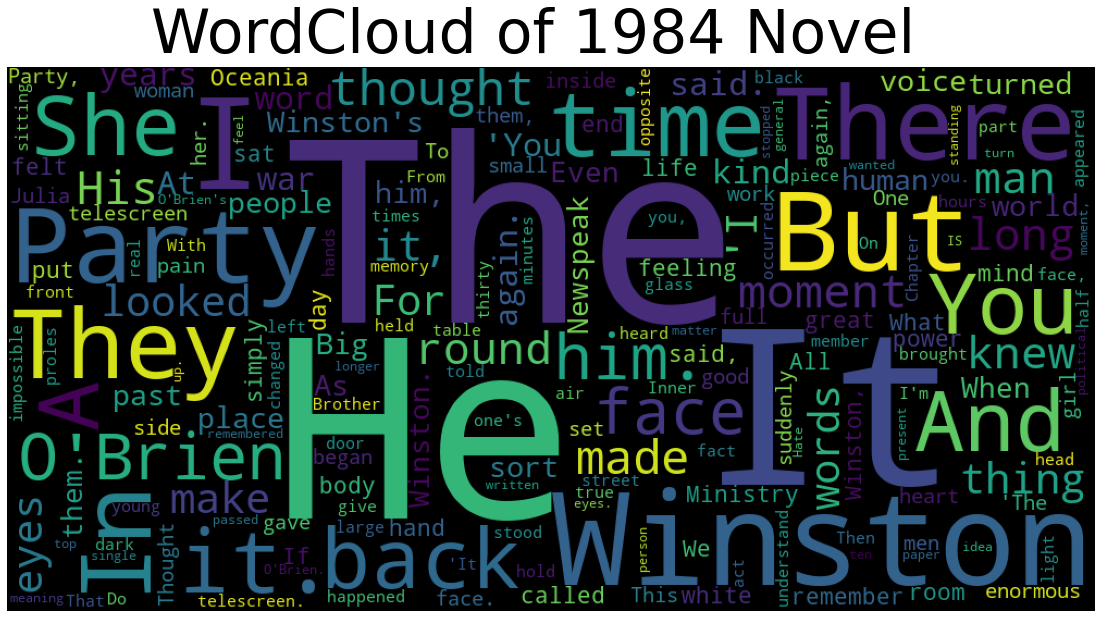

In [37]:
word_cloud_novel_word_list = Counter(clean_novel_word_list)
word_cloud_1984_novel= WordCloud(width = 1000, height=500). generate_from_frequencies(word_cloud_novel_word_list)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"WordCloud of 1984 Novel", fontsize=60, ha='center')
plt.imshow(word_cloud_1984_novel)
plt.axis("off")
plt.show()

# NLP Summarization

In [45]:
nltk.download('punkt')

lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(album_corpus), Tokenizer("english"))
lsa_summary = lsa(parser.document,10)                           
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_album = " ". join(lsa_summary_list)
print("Summary of 1984 album")
summary_album

Summary of 1984 album


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"Drop dead legs, pretty smile Hurts my head, gets me wild Dig that steam Giant butt Makes me scream I get nothing, nothing but the shakes over you And nothing else could ever do Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again? [Verse 1] I get up and nothing gets me down You got it tough, I've seen the toughest around And I know, baby, just how you feel You gotta roll with the punches to get to what's real Here she comes, full blast and top down Hot 

In [46]:
nltk.download('punkt')

lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(novel_corpus), Tokenizer("english"))
lsa_summary = lsa(parser.document,20)                           
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_novel = " ". join(lsa_summary_list)
print("Summary of 1984 novel")
summary_novel

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\users\administrator\appdata\local\programs\python\python38-32\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning: Number of words (5337) is lower than number of sentences (6827). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


Summary of 1984 novel


'Title:      Nineteen eighty-four Author:     George Orwell (pseudonym of Eric Blair) (1903-1950) Chapter 1 It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him. The hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights u

# NLP Sentiment Analysis

In [47]:
nltk.download('vader_lexicon')

sentiment_analyzer= SentimentIntensityAnalyzer()
print("Sentiment Analysis of 1984 Album")
print(sentiment_analyzer.polarity_scores("".join(album_corpus)))

Sentiment Analysis of 1984 Album
{'neg': 0.155, 'neu': 0.712, 'pos': 0.133, 'compound': -0.9953}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


In [ ]:
nltk.download('vader_lexicon')

sentiment_analyzer= SentimentIntensityAnalyzer()
print("Sentiment Analysis of 1984 Novel")
print(sentiment_analyzer.polarity_scores("".join(novel_corpus)))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis of 1984 Novel
